In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import zipfile
nltk.download('wordnet')
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
with zipfile.ZipFile('/content/gdrive/MyDrive/dialect_dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('/content/gdrive/MyDrive/messages.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
df1=pd.read_csv('/content/gdrive/MyDrive/dialect_dataset.csv.zip')
df1

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ
...,...,...
458192,1019484980282580992,BH
458193,1021083283709407232,BH
458194,1017477537889431552,BH
458195,1022430374696239232,BH


In [5]:
df2=pd.read_csv('/content/gdrive/MyDrive/messages.csv.zip',lineterminator='\n')
df2

,Unnamed: 0,0
0,1.175358e+18,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1.175416e+18,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1.175450e+18,@KanaanRema مبين من كلامه خليجي
3,1.175471e+18,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1.175497e+18,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458656,1.057419e+18,@mycousinvinnyys @hanyamikhail1 متهيالي دي شكو...
458657,1.055620e+18,@MahmoudWaked7 @maganenoo في طريق مطروح مركز ب...
458658,NaN,0
458659,1.057419e+18,@mycousinvinnyys @hanyamikhail1 متهيالي دي شكو...


In [6]:
df2 = df2.rename(columns={"Unnamed: 0": "id"})
df2 = df2.rename(columns={"0": "tweets"})
df2

,id,tweets
0,1.175358e+18,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1.175416e+18,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1.175450e+18,@KanaanRema مبين من كلامه خليجي
3,1.175471e+18,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1.175497e+18,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458656,1.057419e+18,@mycousinvinnyys @hanyamikhail1 متهيالي دي شكو...
458657,1.055620e+18,@MahmoudWaked7 @maganenoo في طريق مطروح مركز ب...
458658,NaN,0
458659,1.057419e+18,@mycousinvinnyys @hanyamikhail1 متهيالي دي شكو...


In [7]:
df = pd.merge(df1, df2, on='id')


In [8]:
df = df.drop(columns=['id'])
df

,dialect,tweets
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,IQ,@KanaanRema مبين من كلامه خليجي
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458196,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458197,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458198,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458199,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [9]:
df['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [10]:
len(df['dialect'].unique())

18

In [11]:
df.dialect.value_counts()

dialect
EG    57640
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: count, dtype: int64

# preprocessing

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

dialect    0
tweets     0
dtype: int64

In [15]:
!pip install tashaphyne

In [16]:
classes = {
'EG': 'EG',
'DZ': 'AF',
'TN': 'AF',
'LY': 'AF',
'MA': 'AF',
'JO': 'SHAM',
'LB': 'SHAM',
'PL': 'SHAM',
'SY': 'SHAM',
'IQ': 'IQ',
'KW': 'KJ',
'SA': 'KJ',
'AE': 'KJ',
'OM': 'KJ',
'QA': 'KJ',
'YE': 'YE',
'SD': 'AF',
'BH': 'KJ'
}
df.loc[:, 'dialect']=df['dialect'].replace(classes)


In [17]:
df['dialect'].value_counts()

dialect
KJ      171714
SHAM    115522
AF       87901
EG       57636
IQ       15497
YE        9927
Name: count, dtype: int64

In [18]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from tashaphyne.stemming import ArabicLightStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    tokens = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('arabic'))
    tokens = [token for token in tokens if token not in stop_words]


    stemmer = ArabicLightStemmer()
    tokens = [stemmer.light_stem(token) for token in tokens]

    processed_text = ' '.join(tokens)

    return processed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df.tweets = df.tweets.apply(lambda x: preprocess_text(x))

<ipython-input-19-0d91b05ae58b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tweets = df.tweets.apply(lambda x: preprocess_text(x))


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['dialect'])

X=df['tweets']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2, stratify=y)

In [22]:
vector = TfidfVectorizer()
x_train_tfidf = vector.fit_transform(X_train)
x_test_tfidf = vector.transform(X_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

# Hyperparameters grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False]

}
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(x_train_tfidf, y_train)
pred_of_tfidf = grid.predict(x_test_tfidf)
print(grid.best_params_)


{'alpha': 0.1, 'fit_prior': True}


In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print('\nThe Classification Report:\n', classification_report(y_test, pred_of_tfidf))
print("Accuracy test: "+str(accuracy_score(y_test,pred_of_tfidf)))
y_train_pred = grid.predict(x_train_tfidf)
print("Accuracy train: "+str(accuracy_score(y_train,y_train_pred)))
train_accuracy = accuracy_score(y_train, y_train_pred)


The Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64     17580
           1       0.82      0.63      0.71     11527
           2       0.92      0.14      0.24      3100
           3       0.66      0.91      0.77     34343
           4       0.71      0.68      0.69     23105
           5       0.79      0.02      0.04      1985

    accuracy                           0.70     91640
   macro avg       0.78      0.49      0.51     91640
weighted avg       0.73      0.70      0.68     91640

Accuracy test: 0.7031754692274116
Accuracy train: 0.801785261228131


In [25]:
model = MultinomialNB(alpha=0.1,fit_prior=True)
model.fit(x_train_tfidf, y_train)
pred_NB = grid.predict(x_test_tfidf)
print('\nThe Classification Report:\n', classification_report(y_test, pred_NB))
print("Accuracy test: "+str(accuracy_score(y_test,pred_NB)))
y_train_pred = model.predict(x_train_tfidf)
print("Accuracy train: "+str(accuracy_score(y_train,y_train_pred)))
train_accuracy = accuracy_score(y_train, y_train_pred)


The Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64     17580
           1       0.82      0.63      0.71     11527
           2       0.92      0.14      0.24      3100
           3       0.66      0.91      0.77     34343
           4       0.71      0.68      0.69     23105
           5       0.79      0.02      0.04      1985

    accuracy                           0.70     91640
   macro avg       0.78      0.49      0.51     91640
weighted avg       0.73      0.70      0.68     91640

Accuracy test: 0.7031754692274116
Accuracy train: 0.801785261228131


In [29]:
!pip install seaborn

Text(95.72222222222221, 0.5, 'Acual class')

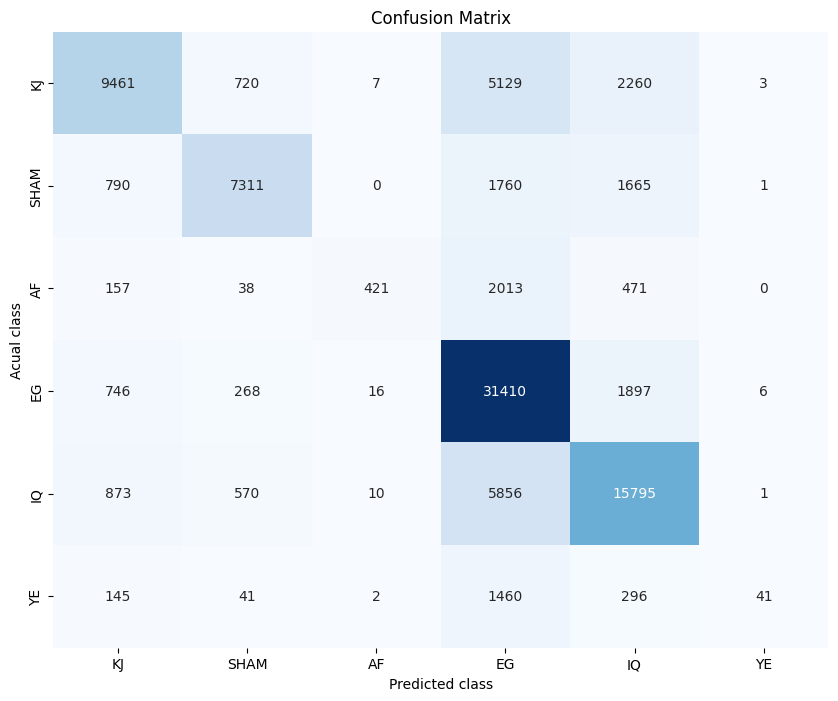

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, pred_NB)
class_labels = ['KJ','SHAM','AF','EG','IQ','YE']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('Acual class')